In [1]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.plot import show
from tqdm import tqdm
import datetime
from sklearn.preprocessing import StandardScaler

# from pythreejs import *

# from pyntcloud import PyntCloud
# from pyntcloud.geometry.models.sphere import create_sphere

# from scipy import stats

# from matplotlib import rcParams
# from mpl_toolkits import mplot3d
# import plotly.graph_objects as go
# import collections
# from mpl_toolkits.mplot3d.axes3d import Axes3D

# from scipy.spatial import ConvexHull

# from IPython.display import display
# from ipywidgets import HTML, Text, Output, VBox

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
EA_prediction_skill = '/home/rgreen/DroughtEDM/Data/EA_prediction_skill/'

In [5]:
LCs_skill_split = '/home/rgreen/DroughtEDM/Data/LCs_skill_split/'

In [6]:
ndvi_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/EA/'

In [7]:
ndvi_eastafrica_simplex_multi_full_ed10_bo = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_ci = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_cr = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_sh = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_clip.tif')
ndvi_eastafrica_simplex_multi_full_ed10_gr = rasterio.open(EA_prediction_skill + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_clip.tif')


Split raster by values that fall above/below 2 standard deviations away from the mean 

In [8]:
list_ndvi_eastafrica_simplex_multi_full_ed10_bo = list(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1).flatten())
list_ndvi_eastafrica_simplex_multi_full_ed10_ci = list(ndvi_eastafrica_simplex_multi_full_ed10_ci.read(1).flatten())
list_ndvi_eastafrica_simplex_multi_full_ed10_cr = list(ndvi_eastafrica_simplex_multi_full_ed10_cr.read(1).flatten())
list_ndvi_eastafrica_simplex_multi_full_ed10_sh = list(ndvi_eastafrica_simplex_multi_full_ed10_sh.read(1).flatten())
list_ndvi_eastafrica_simplex_multi_full_ed10_gr = list(ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1).flatten())


In [9]:
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_bo if str(x) != 'nan']
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_ci = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_ci if str(x) != 'nan']
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_cr = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_cr if str(x) != 'nan']
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_sh = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_sh if str(x) != 'nan']
cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr = [x for x in list_ndvi_eastafrica_simplex_multi_full_ed10_gr if str(x) != 'nan']

In [30]:
def stddev_split(in_list):
    mean = np.mean(in_list, axis = 0)
    sd = np.std(in_list, axis = 0)
    final_list = [x for x in in_list if (x < mean - 2 * sd)]
    return final_list

In [31]:
final_list_bo = stddev_split(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_bo)
final_list_ci = stddev_split(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_ci)
final_list_cr = stddev_split(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_cr)
final_list_sh = stddev_split(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_sh)
final_list_gr = stddev_split(cleaned_list_ndvi_eastafrica_simplex_multi_full_ed10_gr)

In [40]:
max(final_list_bo)

0.5669168

In [32]:
ndvi_eastafrica_simplex_multi_full_ed10_bo_low = np.where(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1) >= max(final_list_bo), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1))
ndvi_eastafrica_simplex_multi_full_ed10_bo_high = np.where(ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1) <= max(final_list_bo), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_bo.read(1))

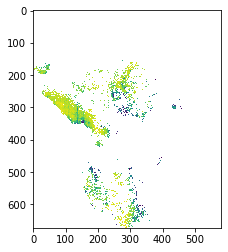

In [49]:
show(ndvi_eastafrica_simplex_multi_full_ed10_bo_high)

In [51]:
[x for x in list(ndvi_eastafrica_simplex_multi_full_ed10_bo_high.flatten()) if str(x) != 'nan']

[0.8918064,
 0.8853742,
 0.90191174,
 0.9431265,
 0.88631463,
 0.69568604,
 0.81409806,
 0.9187243,
 0.67770344,
 0.7268988,
 0.823379,
 0.7488214,
 0.82049674,
 0.8097143,
 0.79906607,
 0.7518381,
 0.7223348,
 0.839096,
 0.83932084,
 0.84292156,
 0.8775904,
 0.79132324,
 0.7864475,
 0.8023855,
 0.8927478,
 0.8302611,
 0.8759305,
 0.831189,
 0.80029625,
 0.8080801,
 0.8303295,
 0.82442605,
 0.882017,
 0.9465389,
 0.9109194,
 0.96001995,
 0.91864043,
 0.92288357,
 0.9573122,
 0.95497084,
 0.9335044,
 0.93611354,
 0.9446691,
 0.8698989,
 0.9236582,
 0.95774806,
 0.9523637,
 0.93375254,
 0.9386162,
 0.94329476,
 0.94844985,
 0.7763431,
 0.9399997,
 0.9400165,
 0.95028394,
 0.9460406,
 0.93630373,
 0.93692255,
 0.9390965,
 0.9507749,
 0.9238746,
 0.93914914,
 0.95943123,
 0.96980876,
 0.7801336,
 0.8728388,
 0.86790895,
 0.8355224,
 0.87103635,
 0.9053625,
 0.9432625,
 0.95477504,
 0.94017583,
 0.9247536,
 0.93269545,
 0.91383386,
 0.89717585,
 0.95253974,
 0.84921634,
 0.82108206,
 0.8062

In [33]:
ndvi_eastafrica_simplex_multi_full_ed10_ci_low = np.where(ndvi_eastafrica_simplex_multi_full_ed10_ci.read(1) >= max(final_list_ci), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_ci.read(1))
ndvi_eastafrica_simplex_multi_full_ed10_ci_high = np.where(ndvi_eastafrica_simplex_multi_full_ed10_ci.read(1) <= max(final_list_ci), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_ci.read(1))

In [34]:
ndvi_eastafrica_simplex_multi_full_ed10_cr_low = np.where(ndvi_eastafrica_simplex_multi_full_ed10_cr.read(1) >= max(final_list_cr), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_cr.read(1))
ndvi_eastafrica_simplex_multi_full_ed10_cr_high = np.where(ndvi_eastafrica_simplex_multi_full_ed10_cr.read(1) <= max(final_list_cr), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_cr.read(1))

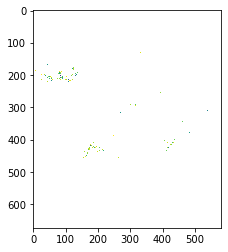

In [35]:
show(ndvi_eastafrica_simplex_multi_full_ed10_cr_low)

In [15]:
ndvi_eastafrica_simplex_multi_full_ed10_sh_low = np.where(ndvi_eastafrica_simplex_multi_full_ed10_sh.read(1) >= max(final_list_sh), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_sh.read(1))
ndvi_eastafrica_simplex_multi_full_ed10_sh_high = np.where(ndvi_eastafrica_simplex_multi_full_ed10_sh.read(1) <= max(final_list_sh), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_sh.read(1))

In [16]:
ndvi_eastafrica_simplex_multi_full_ed10_gr_low = np.where(ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1) >= max(final_list_gr), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1))
ndvi_eastafrica_simplex_multi_full_ed10_gr_high = np.where(ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1) <= max(final_list_gr), np.nan, ndvi_eastafrica_simplex_multi_full_ed10_gr.read(1))

In [338]:
def array2tiff(array, in_dir, out_dir, out_name):
    
    '''
    This function converts a 2D array into a tif using the profile of an existing tif

    '''
    

    with rasterio.open(in_dir+ os.listdir(in_dir)[0]) as src:
        profile = src.profile

    with rasterio.open(out_dir + out_name + '.tif', 'w', **profile) as dst:
        data = array
        data[data<0] = np.nan
        data[data>=0] = 1
        data = data.astype(np.float32)
        #data[data<=0] = np.nan
        dst.write(data, indexes=1)

In [339]:
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_bo_high, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_bo_high')
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_bo_low, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_bo_low')

array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_ci_high, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_ci_high')
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_ci_low, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_ci_low')

array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_cr_high, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_cr_high')
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_cr_low, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_cr_low')

array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_sh_high, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_sh_high')
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_sh_low, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_sh_low')

array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_gr_high, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_gr_high')
array2tiff(ndvi_eastafrica_simplex_multi_full_ed10_gr_low, ndvi_ea, LCs_skill_split, 'ndvi_eastafrica_simplex_multi_full_ed10_gr_low')

In [10]:
precip_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/EA/'
temp_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/EA/'
ndvi_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/EA/'

precip_ea_bo_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/bo_low/'
temp_ea_bo_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/bo_low/'
ndvi_ea_bo_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/bo_low/'

precip_ea_bo_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/bo_high/'
temp_ea_bo_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/bo_high/'
ndvi_ea_bo_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/bo_high/'

precip_ea_ci_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/ci_low/'
temp_ea_ci_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/ci_low/'
ndvi_ea_ci_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/ci_low/'

precip_ea_ci_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/ci_high/'
temp_ea_ci_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/ci_high/'
ndvi_ea_ci_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/ci_high/'

precip_ea_cr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/cr_low/'
temp_ea_cr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/cr_low/'
ndvi_ea_cr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/cr_low/'

precip_ea_cr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/cr_high/'
temp_ea_cr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/cr_high/'
ndvi_ea_cr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/cr_high/'

precip_ea_sh_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/sh_low/'
temp_ea_sh_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/sh_low/'
ndvi_ea_sh_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/sh_low/'

precip_ea_sh_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/sh_high/'
temp_ea_sh_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/sh_high/'
ndvi_ea_sh_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/sh_high/'

precip_ea_gr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/gr_low/'
temp_ea_gr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/gr_low/'
ndvi_ea_gr_low = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/gr_low/'

precip_ea_gr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/stddev_split/gr_high/'
temp_ea_gr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/stddev_split/gr_high/'
ndvi_ea_gr_high = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/stddev_split/gr_high/'


In [11]:
def mask_ras_by_ras(raster, in_dir, out_dir, key):
    
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains('.tif')
    files = files[tifs]
    
    open_raster = rasterio.open(raster)
    read_raster = open_raster.read(1)
    
    for filename in tqdm(files):
        open_filename = rasterio.open(in_dir + filename)
        read_filename = open_filename.read(1)
        masked = read_raster*read_filename
        
        with rasterio.open(in_dir+ os.listdir(in_dir)[0]) as src:
            profile = src.profile

        with rasterio.open(out_dir + str(os.path.splitext(filename)[0]) + '_' + key + '.tif', 'w', **profile) as dst:
            data = masked
            data = data.astype(np.float32)
            dst.write(data, indexes=1)

In [346]:
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_high.tif', precip_ea, precip_ea_bo_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_low.tif', precip_ea, precip_ea_bo_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_low.tif', ndvi_ea, ndvi_ea_bo_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_high.tif', ndvi_ea, ndvi_ea_bo_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_low.tif', temp_ea, temp_ea_bo_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_bo_high.tif', temp_ea, temp_ea_bo_high, 'high')

100%|██████████| 606/606 [00:10<00:00, 57.36it/s]


In [347]:
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_high.tif', precip_ea, precip_ea_ci_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_low.tif', precip_ea, precip_ea_ci_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_low.tif', ndvi_ea, ndvi_ea_ci_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_high.tif', ndvi_ea, ndvi_ea_ci_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_low.tif', temp_ea, temp_ea_ci_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_ci_high.tif', temp_ea, temp_ea_ci_high, 'high')

100%|██████████| 606/606 [00:10<00:00, 59.84it/s]


In [349]:
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_high.tif', precip_ea, precip_ea_cr_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_low.tif', precip_ea, precip_ea_cr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_low.tif', ndvi_ea, ndvi_ea_cr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_high.tif', ndvi_ea, ndvi_ea_cr_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_low.tif', temp_ea, temp_ea_cr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_cr_high.tif', temp_ea, temp_ea_cr_high, 'high')

100%|██████████| 606/606 [00:09<00:00, 63.29it/s]


In [350]:
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_high.tif', precip_ea, precip_ea_sh_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_low.tif', precip_ea, precip_ea_sh_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_low.tif', ndvi_ea, ndvi_ea_sh_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_high.tif', ndvi_ea, ndvi_ea_sh_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_low.tif', temp_ea, temp_ea_sh_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_sh_high.tif', temp_ea, temp_ea_sh_high, 'high')

100%|██████████| 606/606 [00:10<00:00, 58.17it/s]


In [348]:
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_high.tif', precip_ea, precip_ea_gr_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_low.tif', precip_ea, precip_ea_gr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_low.tif', ndvi_ea, ndvi_ea_gr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_high.tif', ndvi_ea, ndvi_ea_gr_high, 'high')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_low.tif', temp_ea, temp_ea_gr_low, 'low')
mask_ras_by_ras(LCs_skill_split + 'ndvi_eastafrica_simplex_multi_full_ed10_gr_high.tif', temp_ea, temp_ea_gr_high, 'high')

100%|██████████| 606/606 [00:10<00:00, 59.60it/s]


In [12]:
def pixelwise_ts_table(in_dir, keyword):
    
    '''
    This function searches through the file directory and creates a dataframe of pixel values over time from rasters
    based on a given keyword describing the environmental variable of interest to generate a raster time series stack 
    
   In the output dataframe, columns are each pixel extracted from the raster (read squentially into a list)
   and rows are the same pixel over time (dekads going down)
    
    Args:
    - in_dir: path to the input directory
    -keyword: string that is unique to the environmental variable
        options: ['chirps', 'lst', 'ndvi', 'pet', 'SM', 'Tmax']
    '''
    
    
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains(keyword)
    files = files[tifs]
    #n_samples = len(files)
    
    
    pixelwise_TS = []
    
    for filename in tqdm(files): 
        
        
            open_file = xr.open_rasterio(in_dir+filename).sel(band=1)
            array = open_file.values
            scaler = StandardScaler()
            scaled = scaler.fit_transform(array)
            # Determine the size of the datatable
            #rs_cols, rs_rows = array.shape()

    #         rs_cols = array.shape[0]
    #         rs_rows = array.shape[1]

            pixel_list = scaled.ravel().tolist()
            
            pixelwise_TS.append(pixel_list)

            # Create a DataFrame from the pixelwise list:
           # table = pd.DataFrame(pixelwise_TS)

            # Add rs_cols and rs_rows as attributes to the table DataFrame
    #         table.rs_cols = rs_cols
    #         table.rs_rows = rs_rows
    #         table.n_samples = n_samples
    #         if label:
    #             table.label = label
    return pd.DataFrame(pixelwise_TS)

    

In [355]:
precip_bo_low = pixelwise_ts_table(precip_ea_bo_low, 'precip')
precip_bo_high = pixelwise_ts_table(precip_ea_bo_high, 'precip')
ndvi_bo_low = pixelwise_ts_table(ndvi_ea_bo_low, 'ndvi')
ndvi_bo_high = pixelwise_ts_table(ndvi_ea_bo_high, 'ndvi')
temp_bo_low = pixelwise_ts_table(temp_ea_bo_low, 'temp')
temp_bo_high = pixelwise_ts_table(temp_ea_bo_high, 'temp')

100%|██████████| 606/606 [00:12<00:00, 47.99it/s]


In [28]:
precip_ci_low = pixelwise_ts_table(precip_ea_ci_low, 'precip')
precip_ci_high = pixelwise_ts_table(precip_ea_ci_high, 'precip')

100%|██████████| 606/606 [00:11<00:00, 50.65it/s]


In [29]:
ndvi_ci_low = pixelwise_ts_table(ndvi_ea_ci_low, 'ndvi')
ndvi_ci_high = pixelwise_ts_table(ndvi_ea_ci_high, 'ndvi')
temp_ci_low = pixelwise_ts_table(temp_ea_ci_low, 'temp')
temp_ci_high = pixelwise_ts_table(temp_ea_ci_high, 'temp')

100%|██████████| 606/606 [00:12<00:00, 49.43it/s]


In [23]:
precip_cr_low = pixelwise_ts_table(precip_ea_cr_low, 'precip')
precip_cr_high = pixelwise_ts_table(precip_ea_cr_high, 'precip')
ndvi_cr_low = pixelwise_ts_table(ndvi_ea_cr_low, 'ndvi')
ndvi_cr_high = pixelwise_ts_table(ndvi_ea_cr_high, 'ndvi')
temp_cr_low = pixelwise_ts_table(temp_ea_cr_low, 'temp')
temp_cr_high = pixelwise_ts_table(temp_ea_cr_high, 'temp')

100%|██████████| 606/606 [00:12<00:00, 49.68it/s]


In [14]:
precip_sh_low = pixelwise_ts_table(precip_ea_sh_low, 'precip')
precip_sh_high = pixelwise_ts_table(precip_ea_sh_high, 'precip')
ndvi_sh_low = pixelwise_ts_table(ndvi_ea_sh_low, 'ndvi')
ndvi_sh_high = pixelwise_ts_table(ndvi_ea_sh_high, 'ndvi')
temp_sh_low = pixelwise_ts_table(temp_ea_sh_low, 'temp')
temp_sh_high = pixelwise_ts_table(temp_ea_sh_high, 'temp')

100%|██████████| 606/606 [00:12<00:00, 47.19it/s]


In [15]:
precip_gr_low = pixelwise_ts_table(precip_ea_gr_low, 'precip')
precip_gr_high = pixelwise_ts_table(precip_ea_gr_high, 'precip')
ndvi_gr_low = pixelwise_ts_table(ndvi_ea_gr_low, 'ndvi')
ndvi_gr_high = pixelwise_ts_table(ndvi_ea_gr_high, 'ndvi')
temp_gr_low = pixelwise_ts_table(temp_ea_gr_low, 'temp')
temp_gr_high = pixelwise_ts_table(temp_ea_gr_high, 'temp')

100%|██████████| 606/606 [00:12<00:00, 48.10it/s]


In [16]:
def clean_pixelwise(in_df):
    nonans = in_df.dropna(axis=1)
    cleaned = nonans.loc[:, (nonans!=0).any(axis=0)]
    return cleaned

In [ ]:
ndvi_bo_high_cleaned = clean_pixelwise(ndvi_bo_high)
ndvi_bo_low_cleaned = clean_pixelwise(ndvi_bo_low)
precip_bo_high_cleaned = clean_pixelwise(precip_bo_high)
precip_bo_low_cleaned = clean_pixelwise(precip_bo_low)
temp_bo_high_cleaned = clean_pixelwise(temp_bo_high)
temp_bo_low_cleaned = clean_pixelwise(temp_bo_low)

In [44]:
ndvi_ci_high_cleaned = clean_pixelwise(ndvi_ci_high)
ndvi_ci_low_cleaned = clean_pixelwise(ndvi_ci_low)
precip_ci_high_cleaned = clean_pixelwise(precip_ci_high)
precip_ci_low_cleaned = clean_pixelwise(precip_ci_low)
temp_ci_high_cleaned = clean_pixelwise(temp_ci_high)
temp_ci_low_cleaned = clean_pixelwise(temp_ci_low)

In [45]:
ndvi_cr_high_cleaned = clean_pixelwise(ndvi_cr_high)
ndvi_cr_low_cleaned = clean_pixelwise(ndvi_cr_low)
precip_cr_high_cleaned = clean_pixelwise(precip_cr_high)
precip_cr_low_cleaned = clean_pixelwise(precip_cr_low)
temp_cr_high_cleaned = clean_pixelwise(temp_cr_high)
temp_cr_low_cleaned = clean_pixelwise(temp_cr_low)

In [17]:
ndvi_sh_high_cleaned = clean_pixelwise(ndvi_sh_high)
ndvi_sh_low_cleaned = clean_pixelwise(ndvi_sh_low)
precip_sh_high_cleaned = clean_pixelwise(precip_sh_high)
precip_sh_low_cleaned = clean_pixelwise(precip_sh_low)
temp_sh_high_cleaned = clean_pixelwise(temp_sh_high)
temp_sh_low_cleaned = clean_pixelwise(temp_sh_low)

In [18]:
ndvi_gr_high_cleaned = clean_pixelwise(ndvi_gr_high)
ndvi_gr_low_cleaned = clean_pixelwise(ndvi_gr_low)
precip_gr_high_cleaned = clean_pixelwise(precip_gr_high)
precip_gr_low_cleaned = clean_pixelwise(precip_gr_low)
temp_gr_high_cleaned = clean_pixelwise(temp_gr_high)
temp_gr_low_cleaned = clean_pixelwise(temp_gr_low)

In [19]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [20]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)

In [21]:
#precip_bo_low_cleaned.insert(0, 'Time', dekads)

In [22]:
def create_embed_block(df):
    
    dfs = []
    
    for colName, colData in df.iteritems():
       # df.insert(0, 'Time', dekads)
        new_df = pd.DataFrame({'Time': dekads, 'Data':colData.values})
        embed_df = Embed(dataFrame = new_df, E = 3, columns = 'Data')
        embed_df.insert(0, 'dekad', (list(range(1,19)) + list(range(1,37))*16 + list(range(1,11))))
 
        dfs.append(embed_df)
   
    concat_dfs = pd.concat(dfs, ignore_index=True) 
    return concat_dfs

In [267]:
precip_bo_low_embedded = create_embed_block(precip_bo_low_cleaned)

In [269]:
precip_bo_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_bo_low_embedded.csv', index = False)

In [282]:
precip_bo_high_embedded = create_embed_block(precip_bo_high_cleaned)

In [283]:
precip_bo_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_bo_high_embedded.csv', index = False)

In [318]:
ndvi_bo_low_embedded = create_embed_block(ndvi_bo_low_cleaned)

In [319]:
ndvi_bo_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_bo_low_embedded.csv', index = False)

In [320]:
ndvi_bo_high_embedded = create_embed_block(ndvi_bo_high_cleaned)

In [321]:
ndvi_bo_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_bo_high_embedded.csv', index = False)

In [371]:
temp_bo_low_embedded = create_embed_block(temp_bo_low_cleaned)

In [372]:
temp_bo_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_bo_low_embedded.csv', index = False)

In [373]:
temp_bo_high_embedded = create_embed_block(temp_bo_high_cleaned)

In [374]:
temp_bo_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_bo_high_embedded.csv', index = False)

In [38]:
ndvi_ci_low_cleaned

In [46]:
ndvi_ci_low_embedded = create_embed_block(ndvi_ci_low_cleaned)
ndvi_ci_high_embedded = create_embed_block(ndvi_ci_high_cleaned)
precip_ci_low_embedded = create_embed_block(precip_ci_low_cleaned)
precip_ci_high_embedded = create_embed_block(precip_ci_high_cleaned)
temp_ci_low_embedded = create_embed_block(temp_ci_low_cleaned)
temp_ci_high_embedded = create_embed_block(temp_ci_high_cleaned)

In [47]:
ndvi_ci_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_ci_low_embedded.csv', index = False)
ndvi_ci_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_ci_high_embedded.csv', index = False)
precip_ci_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_ci_low_embedded.csv', index = False)
precip_ci_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_ci_high_embedded.csv', index = False)
temp_ci_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_ci_low_embedded.csv', index = False)
temp_ci_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_ci_high_embedded.csv', index = False)

In [48]:
ndvi_cr_low_embedded = create_embed_block(ndvi_cr_low_cleaned)
ndvi_cr_high_embedded = create_embed_block(ndvi_cr_high_cleaned)
precip_cr_low_embedded = create_embed_block(precip_cr_low_cleaned)
precip_cr_high_embedded = create_embed_block(precip_cr_high_cleaned)
temp_cr_low_embedded = create_embed_block(temp_cr_low_cleaned)
temp_cr_high_embedded = create_embed_block(temp_cr_high_cleaned)

In [49]:
ndvi_cr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_cr_low_embedded.csv', index = False)
ndvi_cr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_cr_high_embedded.csv', index = False)
precip_cr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_cr_low_embedded.csv', index = False)
precip_cr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_cr_high_embedded.csv', index = False)
temp_cr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_cr_low_embedded.csv', index = False)
temp_cr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_cr_high_embedded.csv', index = False)

In [23]:
ndvi_sh_low_embedded = create_embed_block(ndvi_sh_low_cleaned)
ndvi_sh_high_embedded = create_embed_block(ndvi_sh_high_cleaned)
precip_sh_low_embedded = create_embed_block(precip_sh_low_cleaned)
precip_sh_high_embedded = create_embed_block(precip_sh_high_cleaned)
temp_sh_low_embedded = create_embed_block(temp_sh_low_cleaned)
temp_sh_high_embedded = create_embed_block(temp_sh_high_cleaned)

In [24]:
ndvi_sh_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_sh_low_embedded.csv', index = False)
ndvi_sh_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_sh_high_embedded.csv', index = False)
precip_sh_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_sh_low_embedded.csv', index = False)
precip_sh_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_sh_high_embedded.csv', index = False)
temp_sh_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_sh_low_embedded.csv', index = False)
temp_sh_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_sh_high_embedded.csv', index = False)

In [25]:
ndvi_gr_low_embedded = create_embed_block(ndvi_gr_low_cleaned)
ndvi_gr_high_embedded = create_embed_block(ndvi_gr_high_cleaned)
precip_gr_low_embedded = create_embed_block(precip_gr_low_cleaned)
precip_gr_high_embedded = create_embed_block(precip_gr_high_cleaned)
temp_gr_low_embedded = create_embed_block(temp_gr_low_cleaned)
temp_gr_high_embedded = create_embed_block(temp_gr_high_cleaned)

In [26]:
ndvi_gr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_gr_low_embedded.csv', index = False)
ndvi_gr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/ndvi_gr_high_embedded.csv', index = False)
precip_gr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_gr_low_embedded.csv', index = False)
precip_gr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/precip_gr_high_embedded.csv', index = False)
temp_gr_low_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_gr_low_embedded.csv', index = False)
temp_gr_high_embedded.to_csv('/home/rgreen/DroughtEDM/Data/LCs_skill_split/temp_gr_high_embedded.csv', index = False)